In [24]:
from scipy.stats import mannwhitneyu, ttest_ind, shapiro
import pandas as pd


df = pd.read_csv("data2.csv", sep=';', decimal=',')

result = []
for col in df.columns[1:]:
    group_1 = df[df["group"] == "group_1"][col]
    group_2 = df[df["group"] == "group_2"][col]
    if not (shapiro(group_1)[1] >= 0.05 or shapiro(group_2)[1] >= 0.05):
        res = mannwhitneyu(group_1, group_2)
        result.append([col, round(float(res.pvalue), 4), 'Манн-Уитни'])
    else:
        res = ttest_ind(group_1, group_2)
        result.append([col, round(float(res.pvalue), 4), 'Стьюдент'])

print([['показатель', 'р-уровень', 'метод расчёта']] + sorted(result, key=lambda x: x[1]))

[['показатель', 'р-уровень', 'метод расчёта'], ['V, мм/с', 0.2019, 'Манн-Уитни'], ['Av, мДж/с', 0.202, 'Манн-Уитни'], ['Y, мм ', 0.6069, 'Манн-Уитни'], ['S, мм.кв', 0.9123, 'Манн-Уитни'], ['X, мм', 0.9927, 'Манн-Уитни']]


## Additional

In [15]:
cols = df.columns[1:]
print(cols, col := cols[0])
sub_df = df[df["group"] == "group_1"][cols]

Index(['S, мм.кв', 'Av, мДж/с', 'X, мм', 'Y, мм ', 'V, мм/с'], dtype='object') S, мм.кв


In [21]:
sub_df.corr(method="spearman").style.background_gradient(cmap="cividis")  # RdYlGn cividis    pearson spearman

,"S, мм.кв","Av, мДж/с","X, мм","Y, мм","V, мм/с"
"S, мм.кв",1.000000,0.659004,0.943632,0.759726,0.792495
"Av, мДж/с",0.659004,1.000000,0.577151,0.542192,0.853034
"X, мм",0.943632,0.577151,1.000000,0.630922,0.740528
"Y, мм",0.759726,0.542192,0.630922,1.000000,0.673111
"V, мм/с",0.792495,0.853034,0.740528,0.673111,1.000000


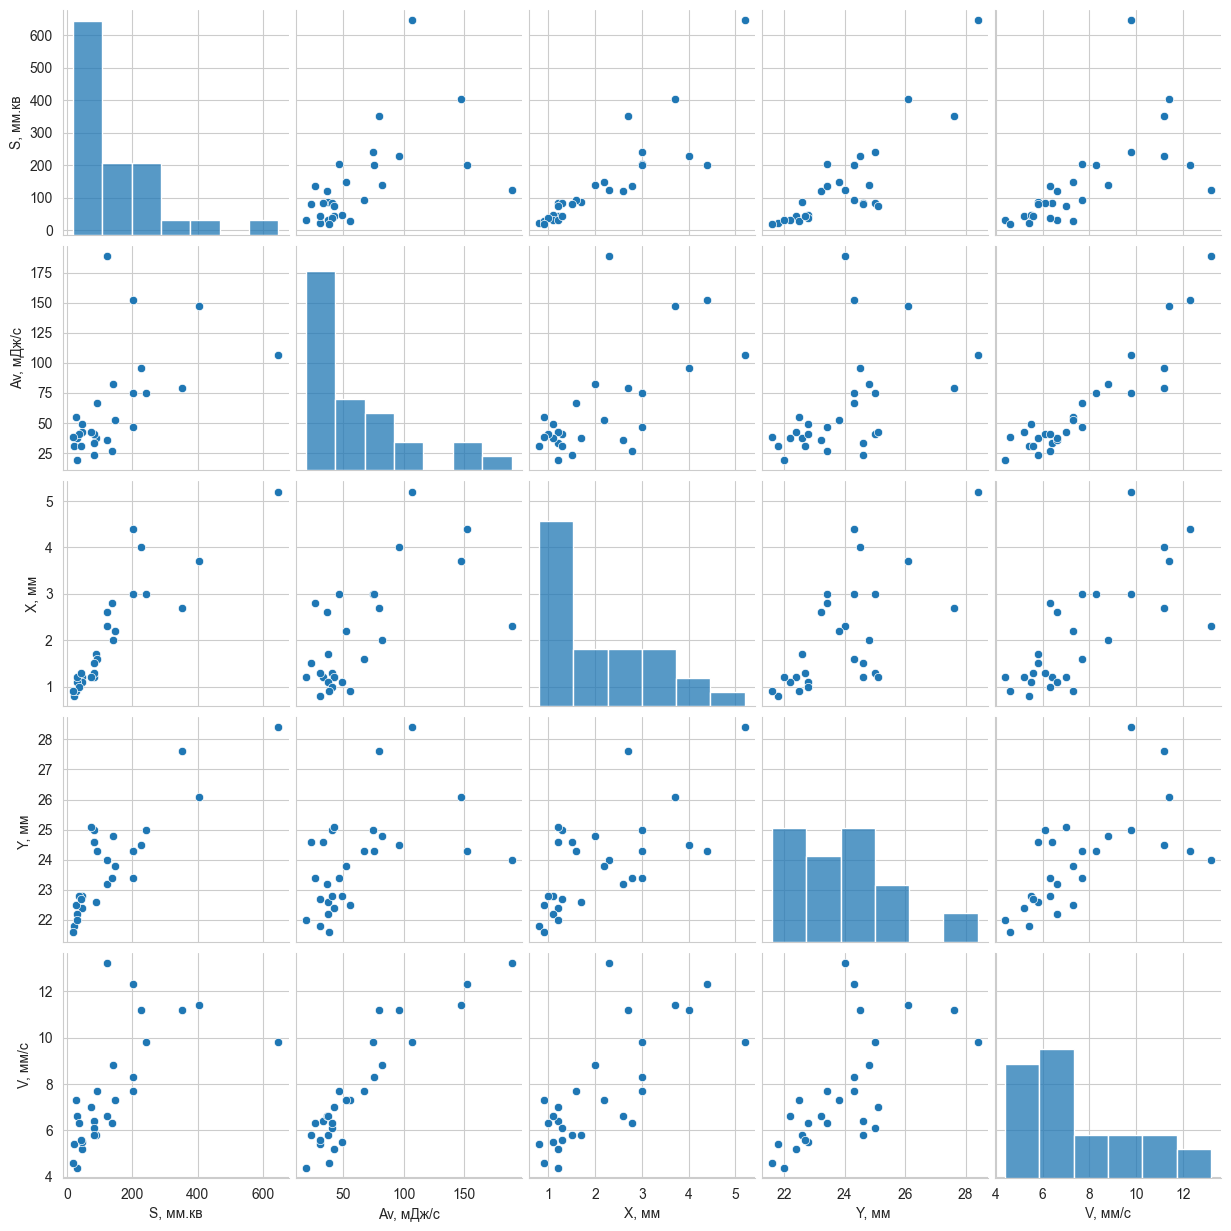

In [22]:
import seaborn as sns

sns.pairplot(sub_df)